In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [83]:
# for punctuation
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# remove stop-words
from nltk.corpus import stopwords

# import regular expression
import re

# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer
# Lemmatization
from nltk.stem import WordNetLemmatizer
# Tokenization
from nltk.tokenize import word_tokenize
# Imporr Ohe 
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/jhaab/Downloads/IMDB Dataset.csv/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

# Basis Text Preprocessing

# LowerCasing

In [5]:
df['review'] = df['review'].str.lower()

In [6]:
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# upperCasing

In [7]:
df['review'] = df['review'].str.upper()
df.head()

,review,sentiment
0,ONE OF THE OTHER REVIEWERS HAS MENTIONED THAT ...,positive
1,A WONDERFUL LITTLE PRODUCTION. <BR /><BR />THE...,positive
2,I THOUGHT THIS WAS A WONDERFUL WAY TO SPEND TI...,positive
3,BASICALLY THERE'S A FAMILY WHERE A LITTLE BOY ...,negative
4,"PETTER MATTEI'S ""LOVE IN THE TIME OF MONEY"" IS...",positive


# Removing Punctuations

In [8]:
# Removing Punctuations
df.review = df.review.replace(string.punctuation, '')
df.head()

,review,sentiment
0,ONE OF THE OTHER REVIEWERS HAS MENTIONED THAT ...,positive
1,A WONDERFUL LITTLE PRODUCTION. <BR /><BR />THE...,positive
2,I THOUGHT THIS WAS A WONDERFUL WAY TO SPEND TI...,positive
3,BASICALLY THERE'S A FAMILY WHERE A LITTLE BOY ...,negative
4,"PETTER MATTEI'S ""LOVE IN THE TIME OF MONEY"" IS...",positive


# Remove Stopword

In [9]:
import nltk
from nltk.corpus import stopwords
# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# lowercase word

In [10]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [11]:
# Intilize Stopwords
stop_words = stopwords.words('english')

# Apply Stopwords
df['review'] = df['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))
# Head 
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. <br /><br />the f...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


# Removing HTMl Tags

In [12]:
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Applying the function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)
df.head()

C:\Users\jhaab\AppData\Local\Temp\ipykernel_16216\384061778.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. the filming techn...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


# Remove url

In [13]:
# Function to remove URLs
def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Applying the function to the 'review' column
df['review'] = df['review'].apply(remove_urls)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. the filming techn...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


# Handling ChatsWords

In [14]:
# Here Come ChatWords Which i Get from a Github Repository
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
     "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
        "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [15]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Calling Function 
df['review'] = df['review'].apply(chat_conversion)

# Head
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. the filming techn...,positive
2,thought wonderful way spend Tears in my eyes h...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love Tears in my eyes money"" ...",positive


# Word_Tokenization

In [16]:
# Tokenization 
from nltk.tokenize import word_tokenize

# Apply word_tokenize
df['review_word_token'] = df['review'].apply(word_tokenize)

# Head
df.head()

,review,sentiment,review_word_token
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production. the filming techn...,positive,"[wonderful, little, production, ., the, filmin..."
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my..."
3,basically there's family little boy (jake) thi...,negative,"[basically, there, 's, family, little, boy, (,..."
4,"petter mattei's ""love Tears in my eyes money"" ...",positive,"[petter, mattei, 's, ``, love, Tears, in, my, ..."


# Sentence_Tokenization

In [17]:
# Tokenization 
from nltk.tokenize import sent_tokenize

# Apply sent_tokenize
df['review_sent_token'] = df['review'].apply(sent_tokenize)

# Head
df.head()

,review,sentiment,review_word_token,review_sent_token
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",[one reviewers mentioned watching 1 oz episode...
1,wonderful little production. the filming techn...,positive,"[wonderful, little, production, ., the, filmin...","[wonderful little production., the filming tec..."
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my...",[thought wonderful way spend Tears in my eyes ...
3,basically there's family little boy (jake) thi...,negative,"[basically, there, 's, family, little, boy, (,...",[basically there's family little boy (jake) th...
4,"petter mattei's ""love Tears in my eyes money"" ...",positive,"[petter, mattei, 's, ``, love, Tears, in, my, ...","[petter mattei's ""love Tears in my eyes money""..."


# Stemming

In [19]:
# Intlize PorterStemmer
ps = PorterStemmer()

# Apply PorterStemmer
df['review_stemmed'] = df['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

# Head
df.head()

,review,sentiment,review_word_token,review_sent_token,review_stemmed
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",[one reviewers mentioned watching 1 oz episode...,one review mention watch 1 oz episod hooked. r...
1,wonderful little production. the filming techn...,positive,"[wonderful, little, production, ., the, filmin...","[wonderful little production., the filming tec...",wonder littl production. the film techniqu una...
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my...",[thought wonderful way spend Tears in my eyes ...,thought wonder way spend tear in my eye hot su...
3,basically there's family little boy (jake) thi...,negative,"[basically, there, 's, family, little, boy, (,...",[basically there's family little boy (jake) th...,basic there' famili littl boy (jake) think the...
4,"petter mattei's ""love Tears in my eyes money"" ...",positive,"[petter, mattei, 's, ``, love, Tears, in, my, ...","[petter mattei's ""love Tears in my eyes money""...","petter mattei' ""love tear in my eye money"" vis..."


# Lemmatization

In [20]:
# Download NLTK resources (uncomment the following line if not already downloaded)?
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# We Will Import WordNetLemmatizer from NLTK Library.
from nltk.stem import WordNetLemmatizer
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Sentence 
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Intilize Punctuation
punctuations="?:!.,;"

# Tokenize Word
sentence_words = nltk.word_tokenize(sentence)

# Using a Loop to Remove Punctuations.
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
# Printing Word and Lemmatized Word
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


# Some Common Terms¶
a. Corpus: The entire collection of text data, comprising all documents or texts under consideration.
b. Vocabulary: The set of unique words present in the corpus.
c. Document: Each individual piece of text in the corpus, such as a review, article, or sentence.
d. Word: The basic unit of textual data, representing a single element of meaning.

In [22]:
# First of all we made a corpus of All words 
corpus = []

# Run a Loop and Append Reviews in corpus
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['review_stemmed'][i])
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

# Len Of Corpus
print(f'The Lenght of the Corpus is : {len(corpus)}')

The Lenght of the Corpus is : 50000


In [23]:
# Total number of words in corpus
# Initialize total_words counter
total_words = 0

# Iterate through each element in the corpus list
for text in corpus:
    # Split the text into words and update the total_words counter
    total_words += len(text.split())

# Print the total number of words
print(f"Total words in Corpus is : {total_words}")

Total words in Corpus is : 6373274


In [24]:
# head
corpus[1]

'wonder littl production the film techniqu unassuming old time bbc fashion give comforting sometim discomforting sens realism entir piece the actor extrem well chosen michael sheen ha got polari voic pat too truli see seamless edit guid refer williams diari entries well worth watch terrificli written perform piece master product one great master comedi life the realism realli come home littl things fantasi guard which rather use tradit dream techniqu remain solid disappears play knowledg senses particularli scene concern orton halliwel set particularli flat halliwell mural decor everi surface terribl well done'

# Vocabulary

In [25]:
# Let's find the unique words in the corpus
vocabulary = set()

# Apply vocabulary
for review in corpus:
    # Split the review into words
    words = review.split()
    # Update the vocabulary set with unique words from the review
    vocabulary.update(words)

# Convert the set back to a list if needed
vocabulary = list(vocabulary)

# Lenght of Vocab
print(f'The Lenght of the Vocabulary  is : {len(vocabulary)}')

The Lenght of the Vocabulary  is : 97876


In [26]:
# Head of Vocab
vocabulary[0:20]

['assecori',
 'forgets',
 'warnerscop',
 'unveils',
 'responsabilities',
 'chakotay',
 'fargan',
 'grayfriar',
 'flaunt',
 'appareantli',
 'rodriques',
 'tribute',
 'edifices',
 'arbitrarili',
 'defraud',
 'rescind',
 'beelin',
 'inclusiveness',
 'lotth',
 'premarit']

In [27]:
df['review'][31]

'"ardh satya" one finest film ever made indian cinema. directed great director govind nihalani, one successful hard hitting parallel cinema also turned commercial success. even today, ardh satya inspiration leading directors india.the film tells real-life scenario mumbai police 70s. unlike police cities india, mumbai police encompasses different system altogether. govind nihalani creates practical outlay real life approach mumbai police environment.amongst various police officers & colleagues, film describes story anand velankar, young hot-blooded cop coming poor family. father harsh police constable. anand suffers father\'s ideologies & incidences father\'s atrocities mother. anand\'s approach towards immediate action crime, inert craving job satisfaction. film revolved plot wherein anand\'s constant efforts crime trampled seniors.this leads frustrations, cannot achieve desired job-satisfaction. resulting frustrations, anger expressed excessive violence remand rooms & bars, also turni

In [28]:
df['review'][31].lower()

'"ardh satya" one finest film ever made indian cinema. directed great director govind nihalani, one successful hard hitting parallel cinema also turned commercial success. even today, ardh satya inspiration leading directors india.the film tells real-life scenario mumbai police 70s. unlike police cities india, mumbai police encompasses different system altogether. govind nihalani creates practical outlay real life approach mumbai police environment.amongst various police officers & colleagues, film describes story anand velankar, young hot-blooded cop coming poor family. father harsh police constable. anand suffers father\'s ideologies & incidences father\'s atrocities mother. anand\'s approach towards immediate action crime, inert craving job satisfaction. film revolved plot wherein anand\'s constant efforts crime trampled seniors.this leads frustrations, cannot achieve desired job-satisfaction. resulting frustrations, anger expressed excessive violence remand rooms & bars, also turni

In [29]:
df['review'][31].upper()

'"ARDH SATYA" ONE FINEST FILM EVER MADE INDIAN CINEMA. DIRECTED GREAT DIRECTOR GOVIND NIHALANI, ONE SUCCESSFUL HARD HITTING PARALLEL CINEMA ALSO TURNED COMMERCIAL SUCCESS. EVEN TODAY, ARDH SATYA INSPIRATION LEADING DIRECTORS INDIA.THE FILM TELLS REAL-LIFE SCENARIO MUMBAI POLICE 70S. UNLIKE POLICE CITIES INDIA, MUMBAI POLICE ENCOMPASSES DIFFERENT SYSTEM ALTOGETHER. GOVIND NIHALANI CREATES PRACTICAL OUTLAY REAL LIFE APPROACH MUMBAI POLICE ENVIRONMENT.AMONGST VARIOUS POLICE OFFICERS & COLLEAGUES, FILM DESCRIBES STORY ANAND VELANKAR, YOUNG HOT-BLOODED COP COMING POOR FAMILY. FATHER HARSH POLICE CONSTABLE. ANAND SUFFERS FATHER\'S IDEOLOGIES & INCIDENCES FATHER\'S ATROCITIES MOTHER. ANAND\'S APPROACH TOWARDS IMMEDIATE ACTION CRIME, INERT CRAVING JOB SATISFACTION. FILM REVOLVED PLOT WHEREIN ANAND\'S CONSTANT EFFORTS CRIME TRAMPLED SENIORS.THIS LEADS FRUSTRATIONS, CANNOT ACHIEVE DESIRED JOB-SATISFACTION. RESULTING FRUSTRATIONS, ANGER EXPRESSED EXCESSIVE VIOLENCE REMAND ROOMS & BARS, ALSO TURNI

# Tokenization

# NLTK is a Library used to tokenize text into sentences and words.

In [30]:
# Import Libraray 
from nltk.tokenize import word_tokenize,sent_tokenize

In [31]:
# Text
sentence = 'I am going to visit delhi!'
# Calling tool
word_tokenize(sentence)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [32]:
# Whole text Containing 2 or more Sentences
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

# Sentence Based Tokenization
sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [33]:
# Some Sentences 
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

# Word Tokenize the Sentences
print(word_tokenize(sent5))
print(word_tokenize(sent6))
print(word_tokenize(sent7))

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']
['We', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'nks', '@', 'gmail.com']
['A', '5km', 'ride', 'cost', '$', '10.50']


# Sentimental Analysis

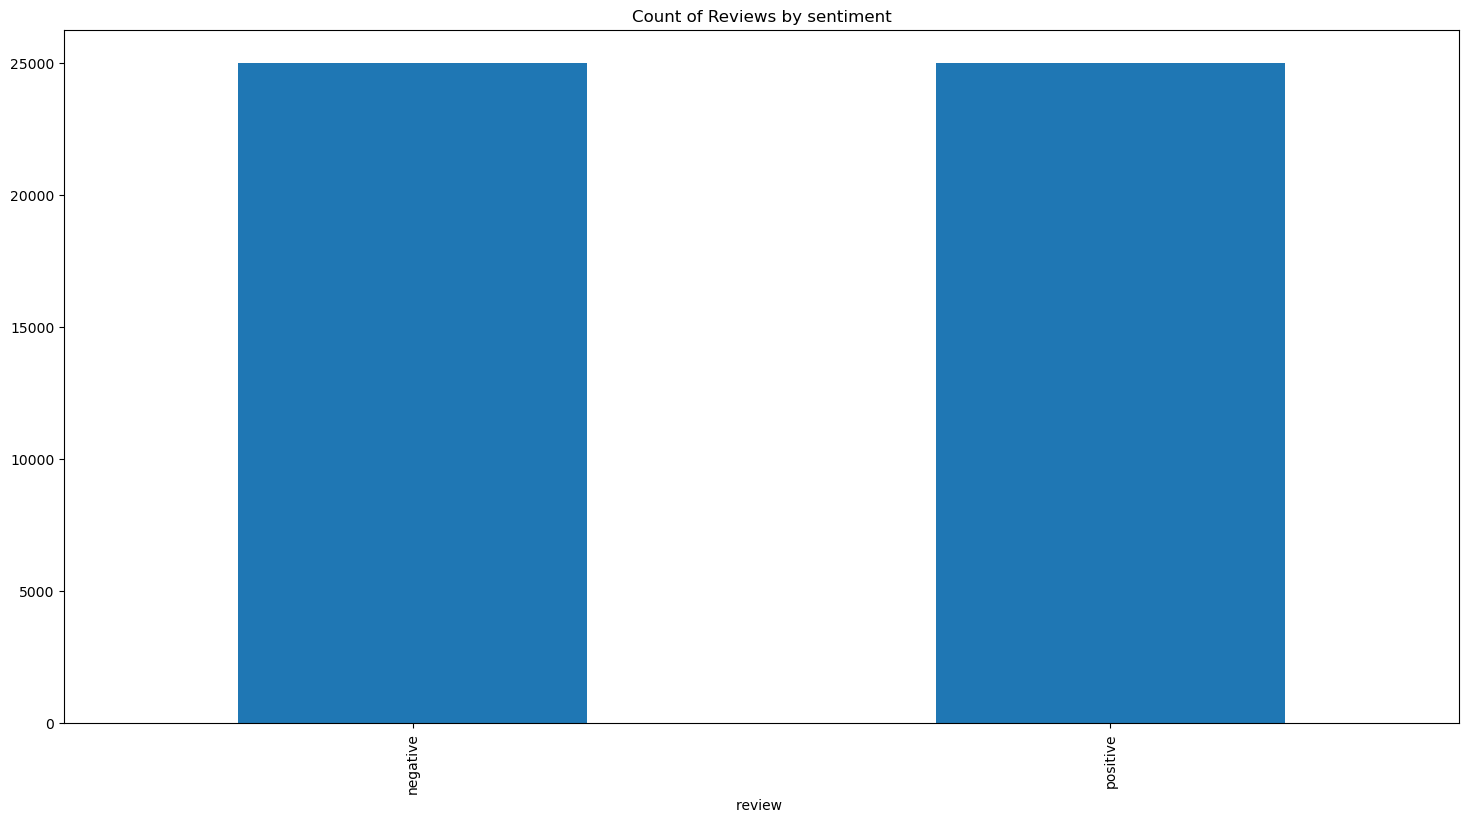

In [34]:
ax = df['sentiment'].value_counts().sort_index() \
          .plot(kind='bar',
          title='Count of Reviews by sentiment',
          figsize=(18, 9))
ax.set_xlabel('review ')
plt.show()

In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review             1000 non-null   object
 1   sentiment          1000 non-null   object
 2   review_word_token  1000 non-null   object
 3   review_sent_token  1000 non-null   object
 4   review_stemmed     1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


In [68]:
# show the number of missing rows in each column
print(df.isna().sum().sort_values(ascending=False))

review               0
sentiment            0
review_word_token    0
review_sent_token    0
review_stemmed       0
dtype: int64


In [69]:
# print unique values in the sentiment column
print(df.sentiment.unique())

['positive' 'negative']


In [70]:
# print the proportion of positive and negative sentiments in the data set
df.sentiment.value_counts(ascending=False, normalize=True)

sentiment
positive    0.501
negative    0.499
Name: proportion, dtype: float64

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks', palette='BrBG')

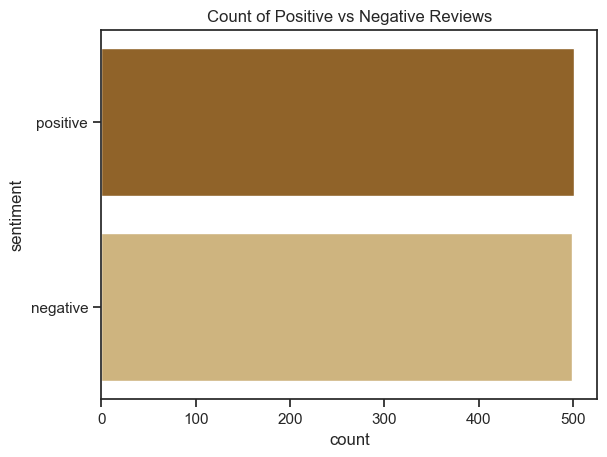

In [72]:
sns.countplot(data=df, y='sentiment')\
   .set(title='Count of Positive vs Negative Reviews')

plt.show()

In [35]:
#Downscale
df = df.head(1000)
print(df.shape)

(1000, 5)


In [36]:
example = df['review'][83]
print(example)

"fate" leads walter sparrow come possession mysterious novel eerie similarities connections life, based around number 23. story unfolds real life fiction, sparrow must figure connection book story eventually end.the number 23 offers intriguing premise undone weak execution. film failed many different levels pretty disappointing held much potential. screenplay probably worst part it. filled silly sequences laughable dialog killed mood movie. seemed like screenwriter good idea, know develop stretch ninety minute running time. second half film running low ideas, twist pretty obvious ending awful.joel schumacher responsible one worst movies ever redeem little phone booth films number 23 reminds he's still capable making stinker. movie drenched style can't get good focus. moves film clunky slow pace. switches reality what's actually happening book quickly got annoying. actual book film that's titled "the number 23" awful detective story audience gets stuck listening carrey narrate bored tea

In [37]:
tokens = nltk.word_tokenize(example)
tokens[:12]

['``',
 'fate',
 "''",
 'leads',
 'walter',
 'sparrow',
 'come',
 'possession',
 'mysterious',
 'novel',
 'eerie',
 'similarities']

In [38]:
tagged = nltk.pos_tag(tokens)
tagged[-5:]

[('suspense', 'JJ'),
 ('thrills', 'NNS'),
 ('.', '.'),
 ('rating', 'NN'),
 ('3/10', 'CD')]

In [39]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)
#entities.pprint()

(S
  ``/``
  fate/NN
  ''/''
  leads/VBZ
  walter/NN
  sparrow/NN
  come/VBN
  possession/NN
  mysterious/JJ
  novel/JJ
  eerie/NN
  similarities/NNS
  connections/NNS
  life/NN
  ,/,
  based/VBN
  around/IN
  number/NN
  23./CD
  story/NN
  unfolds/NNS
  real/JJ
  life/NN
  fiction/NN
  ,/,
  sparrow/VB
  must/MD
  figure/VB
  connection/NN
  book/NN
  story/NN
  eventually/RB
  end.the/JJ
  number/NN
  23/CD
  offers/NNS
  intriguing/JJ
  premise/NN
  undone/NN
  weak/JJ
  execution/NN
  ./.
  film/NN
  failed/VBD
  many/JJ
  different/JJ
  levels/NNS
  pretty/RB
  disappointing/VBG
  held/VBN
  much/JJ
  potential/NN
  ./.
  screenplay/NN
  probably/RB
  worst/JJS
  part/NN
  it/PRP
  ./.
  filled/VBN
  silly/RB
  sequences/NNS
  laughable/JJ
  dialog/NN
  killed/VBD
  mood/NN
  movie/NN
  ./.
  seemed/VBN
  like/IN
  screenwriter/NN
  good/JJ
  idea/NN
  ,/,
  know/VBP
  develop/VB
  stretch/JJ
  ninety/NN
  minute/NN
  running/VBG
  time/NN
  ./.
  second/JJ
  half/NN
  film/NN
  

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores('This dress is perfection! so pretty and flattering.')

{'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.8927}

In [42]:
sia.polarity_scores('Beautifully made pants and on trend with the flared crop. so much cuter in person. love these!')

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9148}

In [43]:
sia.polarity_scores(example)

{'neg': 0.201, 'neu': 0.581, 'pos': 0.218, 'compound': -0.228}

In [44]:
# Run the polarity score on the entire dataset
extdata = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['review'])  # Convert to string
    myid = row['sentiment']
    extdata[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [45]:
vaders = pd.DataFrame(extdata).T
vaders = vaders.reset_index().rename(columns={'index': 'sentiment'})
vaders = vaders.merge(df, how='left')

In [46]:
# Now we have sentiment score and metadata
vaders.head()

,sentiment,neg,neu,pos,compound,review,review_word_token,review_sent_token,review_stemmed
0,positive,0.126,0.769,0.105,-0.6041,one reviewers mentioned watching 1 oz episode ...,"[one, reviewers, mentioned, watching, 1, oz, e...",[one reviewers mentioned watching 1 oz episode...,one review mention watch 1 oz episod hooked. r...
1,positive,0.126,0.769,0.105,-0.6041,wonderful little production. the filming techn...,"[wonderful, little, production, ., the, filmin...","[wonderful little production., the filming tec...",wonder littl production. the film techniqu una...
2,positive,0.126,0.769,0.105,-0.6041,thought wonderful way spend Tears in my eyes h...,"[thought, wonderful, way, spend, Tears, in, my...",[thought wonderful way spend Tears in my eyes ...,thought wonder way spend tear in my eye hot su...
3,positive,0.126,0.769,0.105,-0.6041,"petter mattei's ""love Tears in my eyes money"" ...","[petter, mattei, 's, ``, love, Tears, in, my, ...","[petter mattei's ""love Tears in my eyes money""...","petter mattei' ""love tear in my eye money"" vis..."
4,positive,0.126,0.769,0.105,-0.6041,"probably all-time favorite movie, story selfle...","[probably, all-time, favorite, movie, ,, story...","[probably all-time favorite movie, story selfl...","probabl all-tim favorit movie, stori selflessn..."


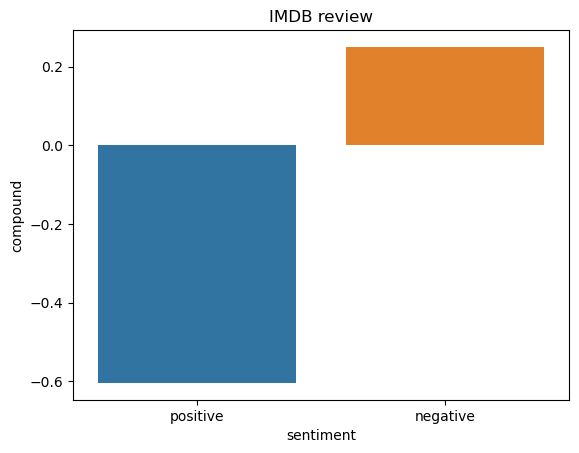

In [47]:
ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('IMDB review')
plt.show()

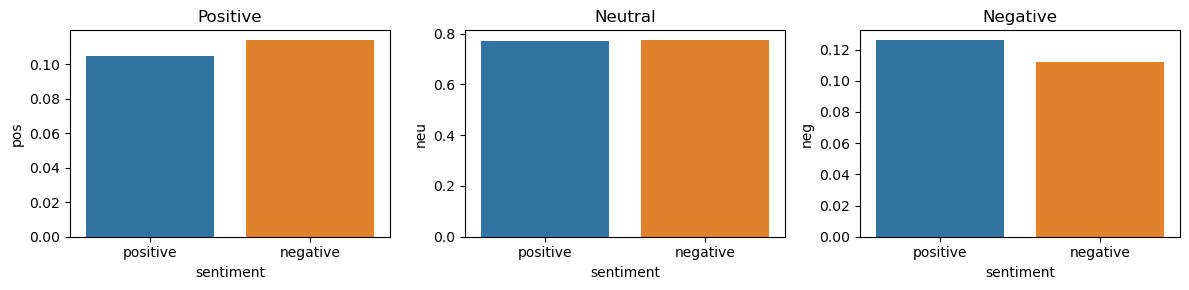

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [49]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [50]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\jhaab\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\jhaab\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [51]:
# VADER results on example
print(example)
sia.polarity_scores(example)

"fate" leads walter sparrow come possession mysterious novel eerie similarities connections life, based around number 23. story unfolds real life fiction, sparrow must figure connection book story eventually end.the number 23 offers intriguing premise undone weak execution. film failed many different levels pretty disappointing held much potential. screenplay probably worst part it. filled silly sequences laughable dialog killed mood movie. seemed like screenwriter good idea, know develop stretch ninety minute running time. second half film running low ideas, twist pretty obvious ending awful.joel schumacher responsible one worst movies ever redeem little phone booth films number 23 reminds he's still capable making stinker. movie drenched style can't get good focus. moves film clunky slow pace. switches reality what's actually happening book quickly got annoying. actual book film that's titled "the number 23" awful detective story audience gets stuck listening carrey narrate bored tea

{'neg': 0.201, 'neu': 0.581, 'pos': 0.218, 'compound': -0.228}

In [52]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
#print(encoded text)
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.88213444, 'roberta_neu': 0.104815535, 'roberta_pos': 0.013050038}


In [53]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [54]:
df.head()

,review,sentiment,review_word_token,review_sent_token,review_stemmed
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",[one reviewers mentioned watching 1 oz episode...,one review mention watch 1 oz episod hooked. r...
1,wonderful little production. the filming techn...,positive,"[wonderful, little, production, ., the, filmin...","[wonderful little production., the filming tec...",wonder littl production. the film techniqu una...
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my...",[thought wonderful way spend Tears in my eyes ...,thought wonder way spend tear in my eye hot su...
3,basically there's family little boy (jake) thi...,negative,"[basically, there, 's, family, little, boy, (,...",[basically there's family little boy (jake) th...,basic there' famili littl boy (jake) think the...
4,"petter mattei's ""love Tears in my eyes money"" ...",positive,"[petter, mattei, 's, ``, love, Tears, in, my, ...","[petter mattei's ""love Tears in my eyes money""...","petter mattei' ""love tear in my eye money"" vis..."


In [55]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['sentiment']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id positive
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id negative
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id negative
Broke for id positive
Broke for id negative
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id positive
Broke for id negative
Broke for id negative
Broke for id positive
Broke for id negative
Broke for id positive
Broke for id negative
Broke for id positive
Broke for id positive
Broke for id positive
Broke for id positive


In [57]:
df.columns

Index(['review', 'sentiment', 'review_word_token', 'review_sent_token',
       'review_stemmed'],
      dtype='object')

# Something Basic EDA

In [60]:
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative     499    499  basically there's family little boy (jake) thi...   
positive     501    501  one reviewers mentioned watching 1 oz episode ...   

               review_word_token         \
          freq             count unique   
sentiment                                 
negative     1               499    499   
positive     1               501    501   

                                                                   \
                                                         top freq   
sentiment                                                           
negative   [basically, there, 's, family, little, boy, (,...    1   
positive   [one, reviewers, mentioned, watching, 1, oz, e...    1   

          review_sent_token         \
                      count unique   
sentiment                            
negative                499    499   
positive                501    501   

                                                                   \
                                                         top freq   
sentiment                                                           
negative   [basically there's family little boy (jake) th...    1   
positive   [one reviewers mentioned watching 1 oz episode...    1   

          review_stemmed         \
                   count unique   
sentiment                         
negative             499    499   
positive             501    501   

                                                                   
                                                         top freq  
sentiment                                                          
negative   basic there' famili littl boy (jake) think the...    1  
positive   one review mention watch 1 oz episod hooked. r...    1

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words="english", min_df=15)

x = vectorizer.fit_transform(df["review"])
y = df["sentiment"].apply(lambda x: 1 if x == 'positive' else 0)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=23)

In [65]:
from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()

modelNB.fit(x_train, y_train)

MultinomialNB()

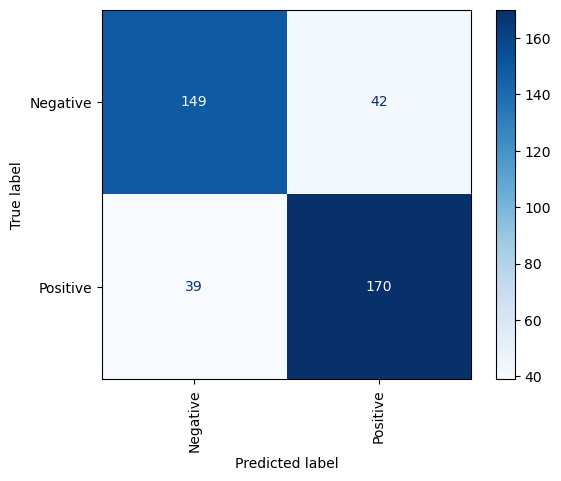

In [66]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(modelNB, x_test, y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

# Plots

In [73]:
df['review_length'] = df['review'].apply(len)

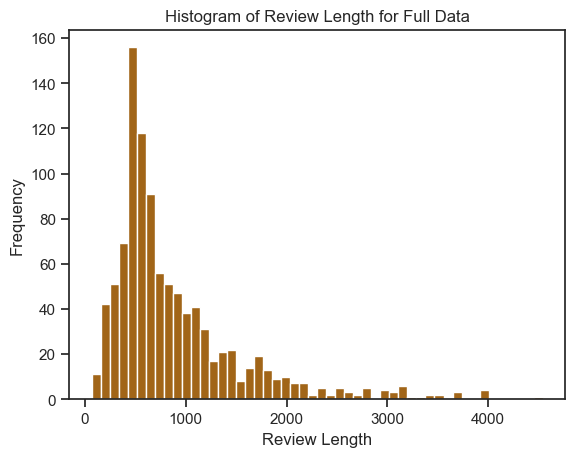

In [74]:
plt.hist(df['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Full Data')
plt.show()

In [78]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

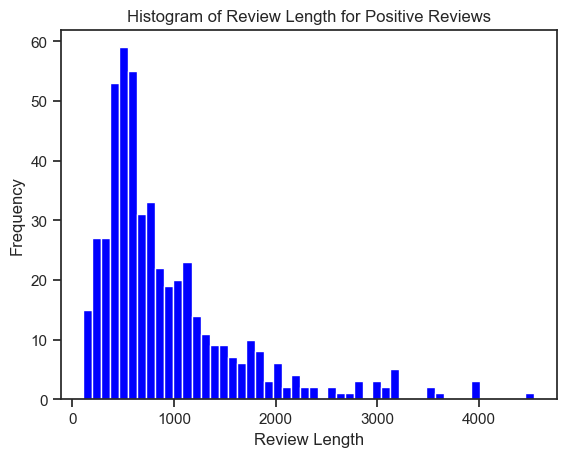

In [79]:
plt.hist(positive_reviews['review_length'], bins=50, color='blue')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Positive Reviews')
plt.show()

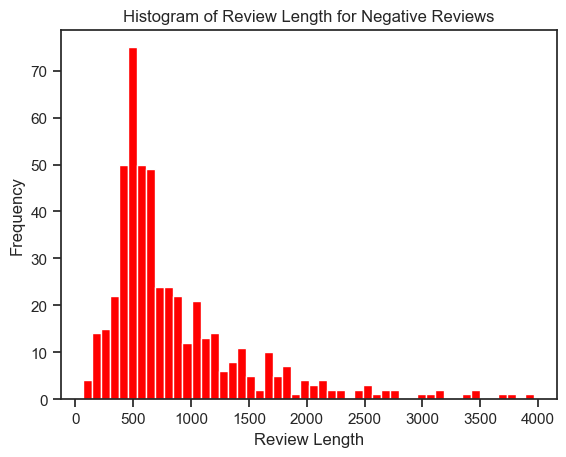

In [80]:
plt.hist(negative_reviews['review_length'], bins=50, color='red')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Negative Reviews')
plt.show()

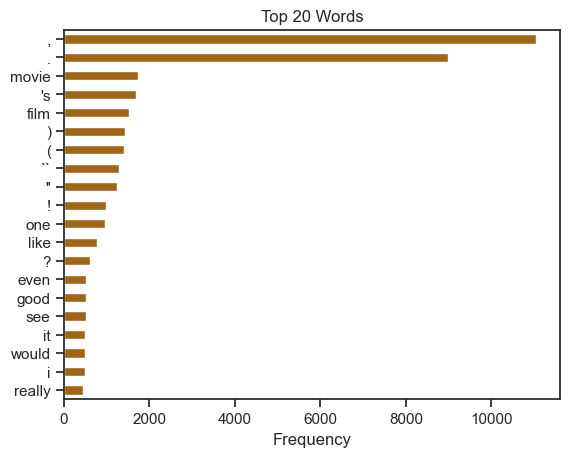

In [84]:
words = nltk.word_tokenize(" ".join(df['review'].values.tolist()))
word_freq = Counter(words)

words_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
top_words = words_df.sort_values(by='Frequency', ascending=False).head(20)

top_words.plot(kind='barh', legend=False)
plt.xlabel('Frequency')
plt.title('Top 20 Words')
plt.gca().invert_yaxis()
plt.show()